# Ionosphere Dataset Analizi

Bu çalışma, `BLM4800` kodlu `Veri Madenciliğine Giriş` dersi kapsamında `Muhammed Taha Güneş` tarafından yapılmıştır. 
Bu radar verileri Goose Bay, Labrador'daki bir sistem tarafından toplandı. Bu sistem, toplam iletilen gücü 6,4 kilovat mertebesinde olan 16 yüksek frekanslı antenden oluşan bir faz dizisinden oluşur. Hedefler iyonosferdeki serbest elektronlardı. "İyi" radar dönüşleri, iyonosferde bir tür yapının kanıtını gösterenlerdir. "Kötü" dönüşler, göstermeyenlerdir; sinyalleri iyonosferden geçer. Alınan sinyaller, argümanları bir darbenin zamanı ve darbe numarası olan bir otokorelasyon fonksiyonu kullanılarak işlendi. Goose Bay sistemi için 17 darbe numarası vardı. Bu veritabanındaki örnekler, karmaşık elektromanyetik sinyalden kaynaklanan fonksiyon tarafından döndürülen karmaşık değerlere karşılık gelen darbe numarası başına 2 öznitelikle tanımlanır. adlı veri kümesini kullanarak 

**İlgili Kütüphanelerin Eklenmesi**

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, SpectralClustering, AffinityPropagation, estimate_bandwidth
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score, adjusted_rand_score
from sklearn import tree
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')


**Veri setini okuma dosyadan okuma işlemi**

In [246]:
df = pd.read_excel('veri.xlsx')
df.drop(columns=df.columns[0], axis=1, inplace=True)

**Veri setinin boyutu**

Veri seti 351 satır ve 35 sütun içermektedir.

In [249]:
print("Veri Seti Boyutu:", df.shape)

Veri Seti Boyutu: (351, 35)


**Veri setinin genel özellikleri**

Her bir sample 34 attribute sahiptir. Bunlardan attribute 1 ve 2 int tipinde geri kalanlar float tipindedir.
Class sütunu ise object tipindedir.

In [252]:
print("\nVeri Seti Özellikleri:")
print(df.info())



Veri Seti Özellikleri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Attribute1   351 non-null    int64  
 1   Attribute2   351 non-null    int64  
 2   Attribute3   351 non-null    float64
 3   Attribute4   351 non-null    float64
 4   Attribute5   351 non-null    float64
 5   Attribute6   351 non-null    float64
 6   Attribute7   351 non-null    float64
 7   Attribute8   351 non-null    float64
 8   Attribute9   351 non-null    float64
 9   Attribute10  351 non-null    float64
 10  Attribute11  351 non-null    float64
 11  Attribute12  351 non-null    float64
 12  Attribute13  351 non-null    float64
 13  Attribute14  351 non-null    float64
 14  Attribute15  351 non-null    float64
 15  Attribute16  351 non-null    float64
 16  Attribute17  351 non-null    float64
 17  Attribute18  351 non-null    float64
 18  Attribute19  351 non-null 

**Veri setinin ilk 5 satırı**

In [255]:
print("\nİlk 5 Satır:")
print(df.head())



İlk 5 Satır:
   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           1           0     0.99539    -0.05889     0.85243     0.02306   
1           1           0     1.00000    -0.18829     0.93035    -0.36156   
2           1           0     1.00000    -0.03365     1.00000     0.00485   
3           1           0     1.00000    -0.45161     1.00000     1.00000   
4           1           0     1.00000    -0.02401     0.94140     0.06531   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute26  \
0     0.83398    -0.37708     1.00000      0.03760  ...     -0.51171   
1    -0.10868    -0.93597     1.00000     -0.04549  ...     -0.26569   
2     1.00000    -0.12062     0.88965      0.01198  ...     -0.40220   
3     0.71216    -1.00000     0.00000      0.00000  ...      0.90695   
4     0.92106    -0.23255     0.77152     -0.16399  ...     -0.65158   

   Attribute27  Attribute28  Attribute29  Attribute30  Attribute31  \
0      0.41078     -

**Veri setinin son 5 satırı**

In [258]:
print("\nSon 5 Satır:")
print(df.tail())



Son 5 Satır:
     Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
346           1           0     0.83508     0.08298     0.73739    -0.14706   
347           1           0     0.95113     0.00419     0.95183    -0.02723   
348           1           0     0.94701    -0.00034     0.93207    -0.03227   
349           1           0     0.90608    -0.01657     0.98122    -0.01989   
350           1           0     0.84710     0.13533     0.73638    -0.06151   

     Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute26  \
346     0.84349    -0.05567     0.90441     -0.04622  ...     -0.04202   
347     0.93438    -0.01920     0.94590      0.01606  ...      0.01361   
348     0.95177    -0.03431     0.95584      0.02446  ...      0.03193   
349     0.95691    -0.03646     0.85746      0.00110  ...     -0.02099   
350     0.87873     0.08260     0.88928     -0.09139  ...     -0.15114   

     Attribute27  Attribute28  Attribute29  Attribute30  Attribute

# Eksik Veri Analizi

Tüm sample ve attributelara baktığımızda herhangi bir eksik verinin olmadığı görülmüştür.

In [261]:
print("\nEksik Veri Analizi:")
print(df.isnull().sum())


Eksik Veri Analizi:
Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
Attribute21    0
Attribute22    0
Attribute23    0
Attribute24    0
Attribute25    0
Attribute26    0
Attribute27    0
Attribute28    0
Attribute29    0
Attribute30    0
Attribute31    0
Attribute32    0
Attribute33    0
Attribute34    0
Class          0
dtype: int64


# Verisetinde Sınıf Dağılımı

Verilerimiz `g` ve `b` olmak üzere iki ayrı sınıfa ayrılmaktadır. Bu verilerden 225'i g ve 126'sı b'dir.

In [264]:
print("\nSınıf Dağılımı:")
print(df['Class'].value_counts())


Sınıf Dağılımı:
Class
g    225
b    126
Name: count, dtype: int64


**Sınıf dağılımının görselleştirilmesi**

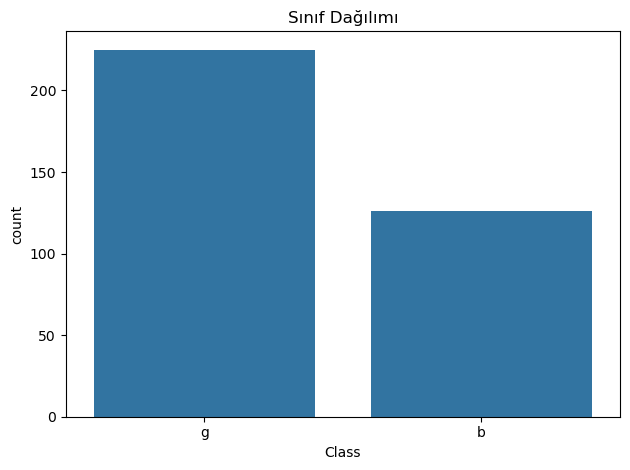

In [267]:
sns.countplot(x='Class',data=df)
plt.title('Sınıf Dağılımı')
plt.tight_layout()
plt.savefig('sinif_dagilimi.png')

# Özelliklerin İstatistiksel Analizi
Her bir attribute ayrı ayrı incelendiğinde hepsinin sayısının 351 olduğu görülmüştür.
Ortalama, standart sapma, min, ilk çeyrekler açıklığı, ikinci çeyrekler açıklığı, üçüncü çeyrekler açıklığı ve  max değerleri aşağıda yazdırılmıştır.

In [270]:
print("\nÖzelliklerin İstatistiksel Analizi:")
print(df.describe().T)


Özelliklerin İstatistiksel Analizi:
             count      mean       std  min       25%      50%       75%  max
Attribute1   351.0  0.891738  0.311155  0.0  1.000000  1.00000  1.000000  1.0
Attribute2   351.0  0.000000  0.000000  0.0  0.000000  0.00000  0.000000  0.0
Attribute3   351.0  0.641342  0.497708 -1.0  0.472135  0.87111  1.000000  1.0
Attribute4   351.0  0.044372  0.441435 -1.0 -0.064735  0.01631  0.194185  1.0
Attribute5   351.0  0.601068  0.519862 -1.0  0.412660  0.80920  1.000000  1.0
Attribute6   351.0  0.115889  0.460810 -1.0 -0.024795  0.02280  0.334655  1.0
Attribute7   351.0  0.550095  0.492654 -1.0  0.211310  0.72873  0.969240  1.0
Attribute8   351.0  0.119360  0.520750 -1.0 -0.054840  0.01471  0.445675  1.0
Attribute9   351.0  0.511848  0.507066 -1.0  0.087110  0.68421  0.953240  1.0
Attribute10  351.0  0.181345  0.483851 -1.0 -0.048075  0.01829  0.534195  1.0
Attribute11  351.0  0.476183  0.563496 -1.0  0.021120  0.66798  0.957895  1.0
Attribute12  351.0  0.15504

**Aykırı değer analizi için box plot**

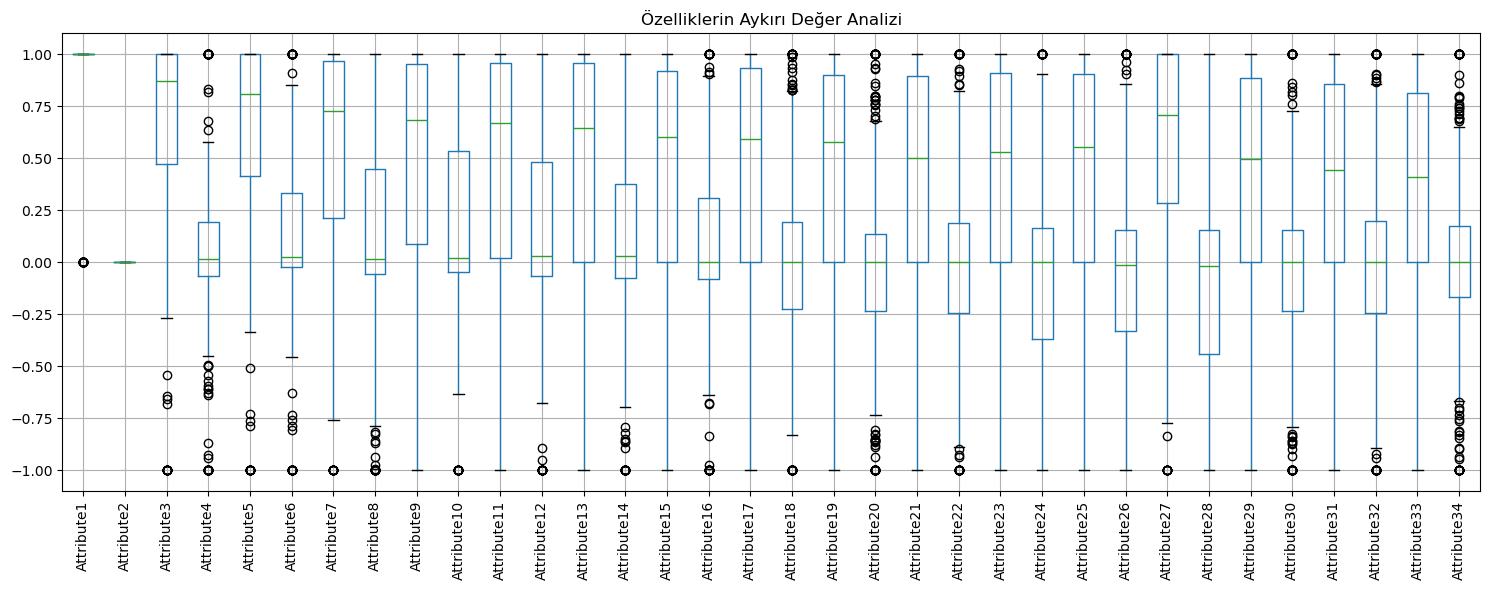

In [273]:
plt.figure(figsize=(15, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.boxplot()
plt.xticks(rotation=90)
plt.title('Özelliklerin Aykırı Değer Analizi')
plt.tight_layout()
plt.savefig('aykiri_deger_analizi.png')

**Aykırı Verileri İşaretleme**

In [275]:
# Sınıfları ve özellikleri ayırma
classes = df['Class'].unique()
attributes = df.columns[:-1]

# Aykırı değer sayılarını hesaplama
outlier_counts = pd.DataFrame(index=classes, columns=attributes)

for cls in classes:
    for attr in attributes:
        # Sınıfa ve özelliğe göre veriyi filtreleme
        subset = df[df['Class'] == cls][attr]
        
        # IQR ile aykırı değerleri tespit etme
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Aykırı değer sayısını hesaplama
        outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
        outlier_counts.loc[cls, attr] = len(outliers)



**Aykırı Değer Isı Haritası**

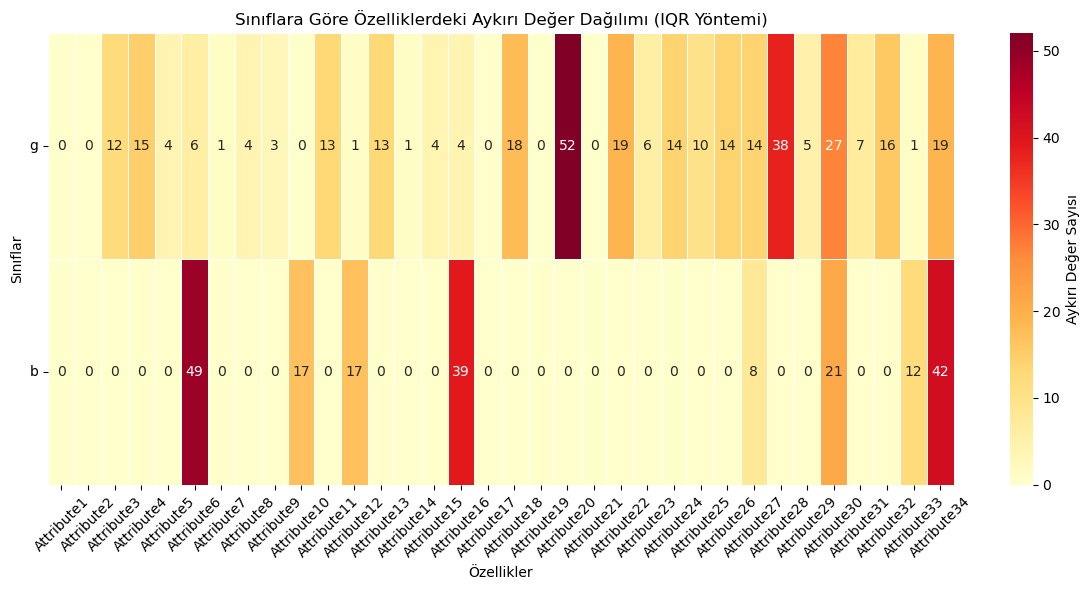

In [279]:
# Heatmap oluşturma
plt.figure(figsize=(12, 6))
sns.heatmap(outlier_counts.astype(int), 
            annot=True, 
            fmt='d', 
            cmap='YlOrRd', 
            linewidths=.5,
            cbar_kws={'label': 'Aykırı Değer Sayısı'})

plt.title("Sınıflara Göre Özelliklerdeki Aykırı Değer Dağılımı (IQR Yöntemi)")
plt.ylabel("Sınıflar")
plt.xlabel("Özellikler")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('sinif_bazli_aykiri_deger_heatmap.png')
plt.show()

**Korelasyon analizi**

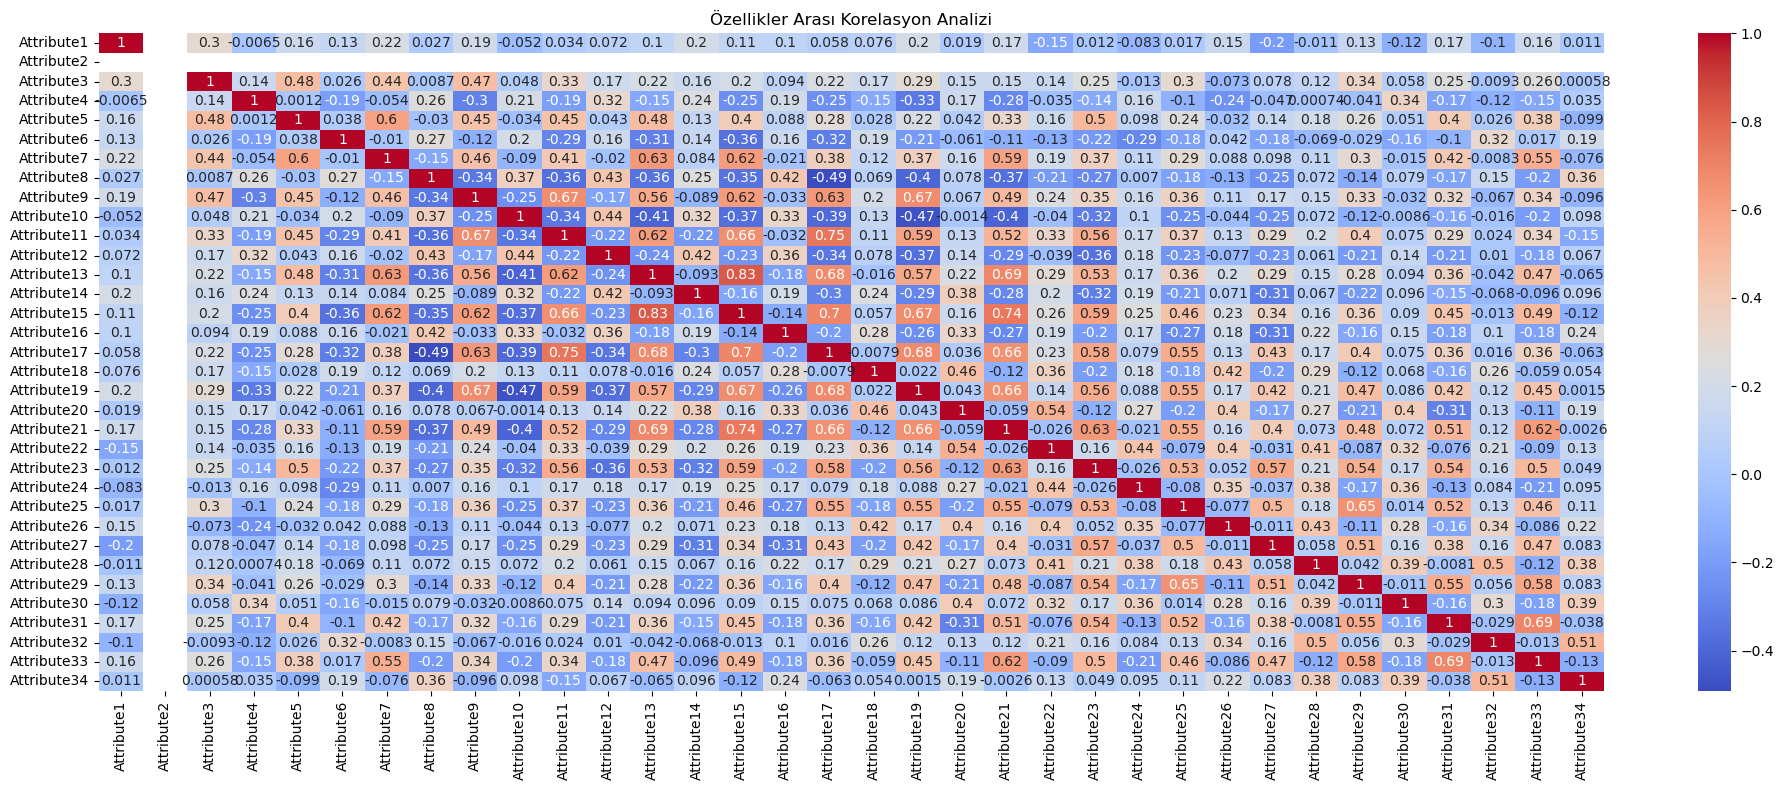

In [281]:
plt.figure(figsize=(20, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Özellikler Arası Korelasyon Analizi')
plt.tight_layout()
plt.savefig('korelasyon_analizi.png')

**Özellikler ile Class Ayırma**

In [284]:
X = df.drop('Class', axis=1)  
y = df['Class']  

**Veriyi eğitim ve test setlerine ayırma**

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest ile özellik önemliliği**

In [288]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Özellik önemliliği bulunması**

In [290]:
feature_importance = pd.DataFrame({
    'Özellik': X.columns,
    'Önem': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('Önem', ascending=False)

**Özellik önemliliğinin görselleştirilmesi**

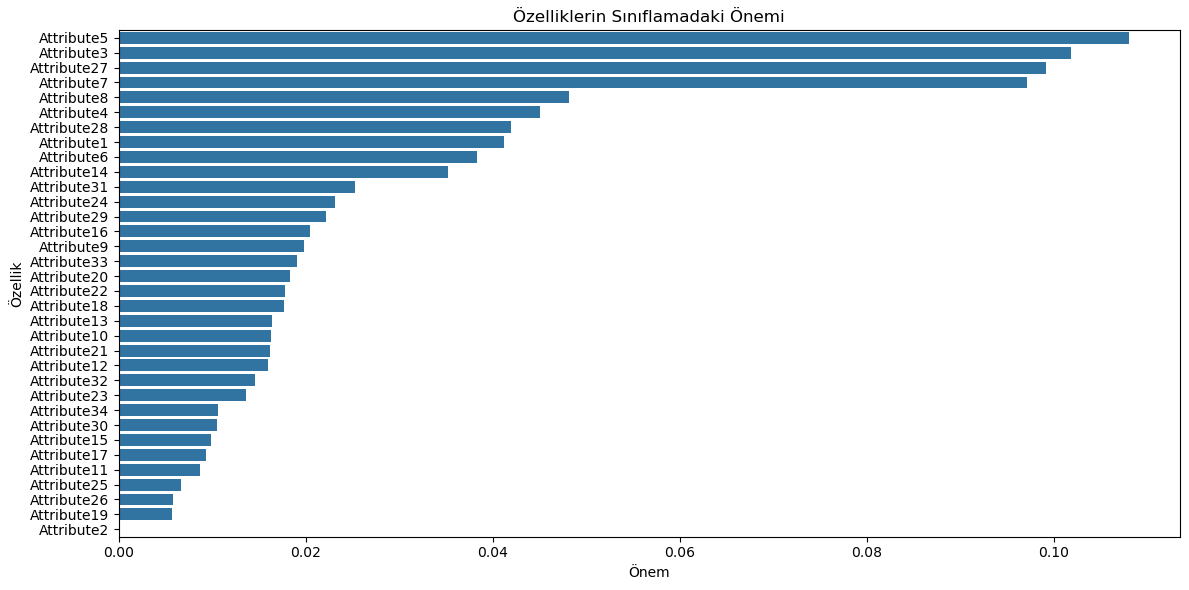

In [292]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Önem', y='Özellik', data=feature_importance)
plt.title('Özelliklerin Sınıflamadaki Önemi')
plt.tight_layout()
plt.savefig('ozellik_onemi.png')

In [293]:
print("\nÖzelliklerin Sınıflamadaki Önemi:")
print(feature_importance)


Özelliklerin Sınıflamadaki Önemi:
        Özellik      Önem
4    Attribute5  0.108066
2    Attribute3  0.101792
26  Attribute27  0.099180
6    Attribute7  0.097077
7    Attribute8  0.048163
3    Attribute4  0.045073
27  Attribute28  0.041926
0    Attribute1  0.041204
5    Attribute6  0.038357
13  Attribute14  0.035240
30  Attribute31  0.025281
23  Attribute24  0.023117
28  Attribute29  0.022193
15  Attribute16  0.020449
8    Attribute9  0.019794
32  Attribute33  0.019106
19  Attribute20  0.018325
21  Attribute22  0.017842
17  Attribute18  0.017683
12  Attribute13  0.016394
9   Attribute10  0.016272
20  Attribute21  0.016154
11  Attribute12  0.015956
31  Attribute32  0.014603
22  Attribute23  0.013603
33  Attribute34  0.010631
29  Attribute30  0.010506
14  Attribute15  0.009903
16  Attribute17  0.009301
10  Attribute11  0.008663
24  Attribute25  0.006634
25  Attribute26  0.005779
18  Attribute19  0.005731
1    Attribute2  0.000000


**Attribute2 tüm satırlarda 0 ve aynı olduğu için önem derecesi 0 yani yok. Bu yüzden datasetten onu ayıralım.**

In [298]:
df.drop(columns=df.columns[1], axis=1, inplace=True)
print(df)

     Attribute1  Attribute3  Attribute4  Attribute5  Attribute6  Attribute7  \
0             1     0.99539    -0.05889     0.85243     0.02306     0.83398   
1             1     1.00000    -0.18829     0.93035    -0.36156    -0.10868   
2             1     1.00000    -0.03365     1.00000     0.00485     1.00000   
3             1     1.00000    -0.45161     1.00000     1.00000     0.71216   
4             1     1.00000    -0.02401     0.94140     0.06531     0.92106   
..          ...         ...         ...         ...         ...         ...   
346           1     0.83508     0.08298     0.73739    -0.14706     0.84349   
347           1     0.95113     0.00419     0.95183    -0.02723     0.93438   
348           1     0.94701    -0.00034     0.93207    -0.03227     0.95177   
349           1     0.90608    -0.01657     0.98122    -0.01989     0.95691   
350           1     0.84710     0.13533     0.73638    -0.06151     0.87873   

     Attribute8  Attribute9  Attribute10  Attribute

# Sınıflandırma

**Veriyi ölçeklendirme**

In [305]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Eğitim ve test setlerine ayırma**

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**KNN Algoritması için en iyi parametrelerin aranması**

In [312]:
knn_params = {'n_neighbors': np.arange(2, 50)}  
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=3)
knn_cv.fit(X_train, y_train)

print('En iyi skor: ' + str(knn_cv.best_score_))
print('En iyi parametreler: ' + str(knn_cv.best_params_))

En iyi skor: 0.8784793716159537
En iyi parametreler: {'n_neighbors': 2}


**Her bulunan sonucu saklamak için dizi**

In [314]:
results = {}

**Random Forest**

Random Forest Sınıflandırıcı Sonuçları:

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           b       0.96      0.89      0.93        28
           g       0.93      0.98      0.95        43

    accuracy                           0.94        71
   macro avg       0.95      0.93      0.94        71
weighted avg       0.94      0.94      0.94        71



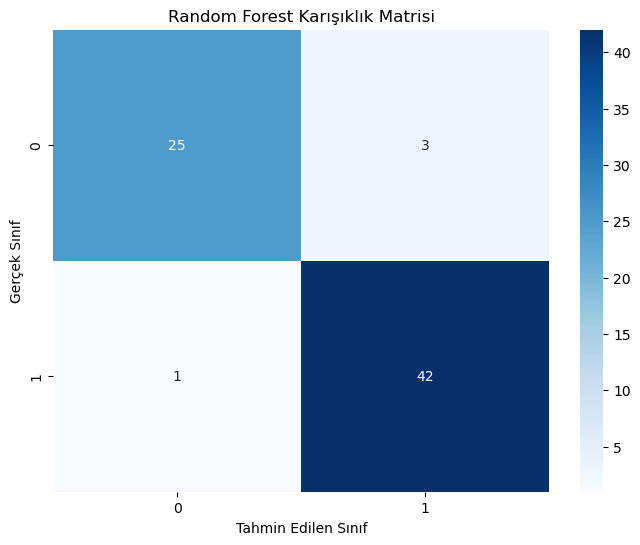

In [318]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Sınıflandırıcı Sonuçları:")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Karışıklık Matrisi')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.savefig('RandomForest_karisiklik_matrisi.png')

results['Random Forest'] = {
    'accuracy': rf_clf.score(X_test, y_test),
    'confusion_matrix': cm_rf
}

**SVM**


SVM Sınıflandırıcı Sonuçları:

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           b       1.00      0.86      0.92        28
           g       0.91      1.00      0.96        43

    accuracy                           0.94        71
   macro avg       0.96      0.93      0.94        71
weighted avg       0.95      0.94      0.94        71



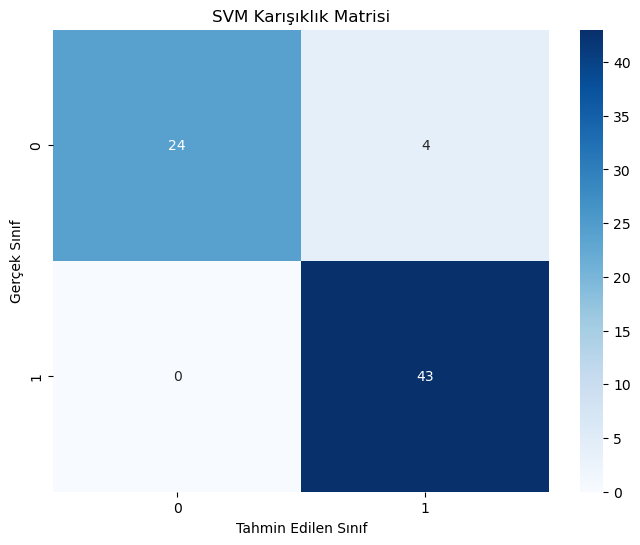

In [321]:
# SVM
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

print("\nSVM Sınıflandırıcı Sonuçları:")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Karışıklık Matrisi')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.savefig('SVM_karisiklik_matrisi.png')

results['SVM'] = {
    'accuracy': svm_clf.score(X_test, y_test),
    'confusion_matrix': cm_svm
}

**KNN**


KNN Sınıflandırıcı Sonuçları:

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           b       1.00      0.68      0.81        28
           g       0.83      1.00      0.91        43

    accuracy                           0.87        71
   macro avg       0.91      0.84      0.86        71
weighted avg       0.90      0.87      0.87        71



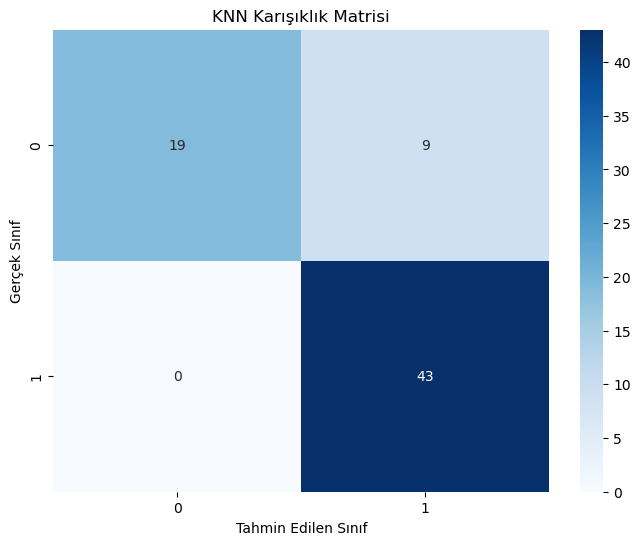

In [324]:
# KNN
knn_clf = KNeighborsClassifier(2)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

print("\nKNN Sınıflandırıcı Sonuçları:")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Karışıklık Matrisi')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.savefig('KNN_karisiklik_matrisi.png')

results['KNN'] = {
    'accuracy': knn_clf.score(X_test, y_test),
    'confusion_matrix': cm_knn
}

**Neural Network**


Neural Network Sınıflandırıcı Sonuçları:

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           b       1.00      0.82      0.90        28
           g       0.90      1.00      0.95        43

    accuracy                           0.93        71
   macro avg       0.95      0.91      0.92        71
weighted avg       0.94      0.93      0.93        71



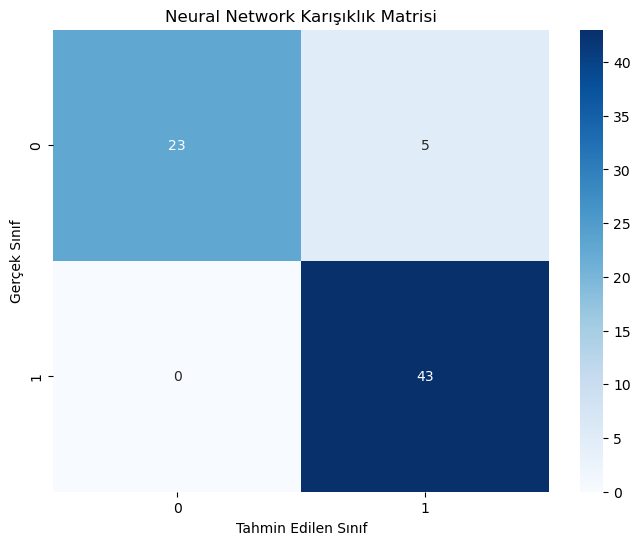

In [326]:
# Neural Network
nn_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_clf.fit(X_train, y_train)
y_pred_nn = nn_clf.predict(X_test)

print("\nNeural Network Sınıflandırıcı Sonuçları:")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_nn))

cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Karışıklık Matrisi')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.savefig('NeuralNetwork_karisiklik_matrisi.png')

results['Neural Network'] = {
    'accuracy': nn_clf.score(X_test, y_test),
    'confusion_matrix': cm_nn
}

**Decision Tree**


Decision Tree Sınıflandırıcı Sonuçları:

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           b       0.95      0.75      0.84        28
           g       0.86      0.98      0.91        43

    accuracy                           0.89        71
   macro avg       0.91      0.86      0.88        71
weighted avg       0.90      0.89      0.88        71



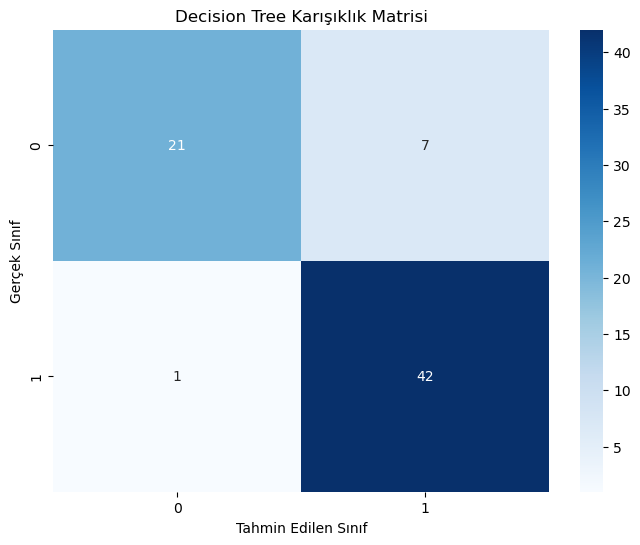

In [329]:
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

print("\nDecision Tree Sınıflandırıcı Sonuçları:")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Karışıklık Matrisi')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.savefig('DecisionTree_karisiklik_matrisi.png')

results['Decision Tree'] = {
    'accuracy': dt_clf.score(X_test, y_test),
    'confusion_matrix': cm_dt
}

**Sonuçların Kıyaslanması**

In [333]:
# Tüm sonuçları gösterme
print("\nTüm Modellerin Performans Sonuçları:")
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])


Tüm Modellerin Performans Sonuçları:

Random Forest:
Accuracy: 0.9437
Confusion Matrix:
[[25  3]
 [ 1 42]]

SVM:
Accuracy: 0.9437
Confusion Matrix:
[[24  4]
 [ 0 43]]

KNN:
Accuracy: 0.8732
Confusion Matrix:
[[19  9]
 [ 0 43]]

Neural Network:
Accuracy: 0.9296
Confusion Matrix:
[[23  5]
 [ 0 43]]

Decision Tree:
Accuracy: 0.8873
Confusion Matrix:
[[21  7]
 [ 1 42]]


**Bu 5 yöntemden en iyi üçünün sırasıyla SVM, Random Forest ve Neural Network olduğunu görürüz.**

# Kümeleme algoritmaları

**Sonuçları saklamak için dizi**

In [338]:
results2 = {}

**K-Means**

K-Means Kümeleme Sonuçları:
Silhouette Skoru: 0.2704
Adjusted Rand Index: 0.1679


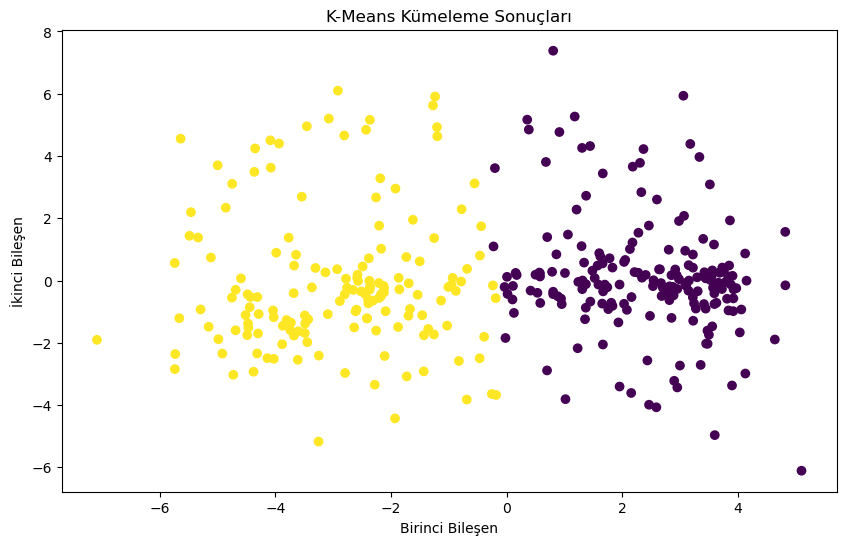

In [341]:
# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("K-Means Kümeleme Sonuçları:")

# Silhouette skoru
if len(np.unique(kmeans_labels)) > 1:
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
    print(f"Silhouette Skoru: {kmeans_silhouette:.4f}")

# Adjusted Rand Index
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
print(f"Adjusted Rand Index: {kmeans_ari:.4f}")

# Görselleştirme
plt.figure(figsize=(10, 6))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Kümeleme Sonuçları')
plt.xlabel('Birinci Bileşen')
plt.ylabel('İkinci Bileşen')
plt.savefig('KMeans_kumeleme.png')

results2['K-Means'] = {
    'silhouette_score': kmeans_silhouette if len(np.unique(kmeans_labels)) > 1 else None,
    'adjusted_rand_score': kmeans_ari,
    'labels': kmeans_labels
}

**DBSCAN**


DBSCAN Kümeleme Sonuçları:
Adjusted Rand Index: -0.0346


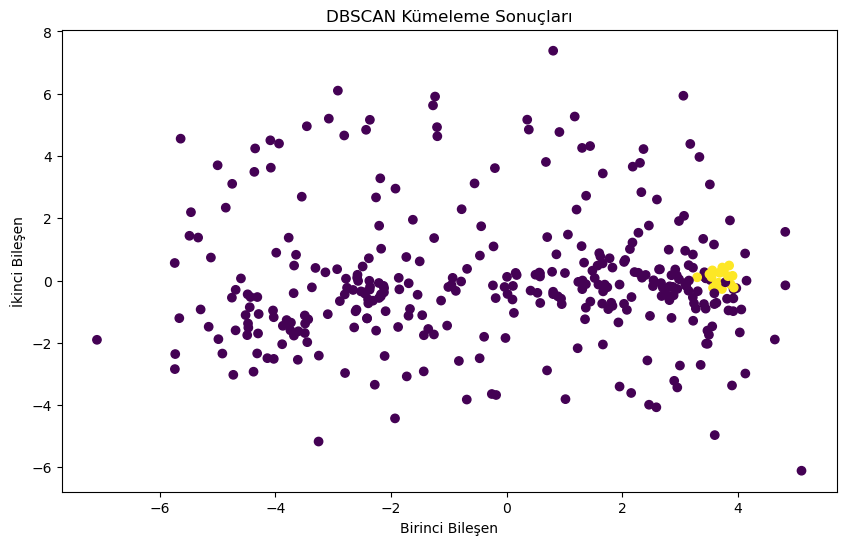

In [344]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

print("\nDBSCAN Kümeleme Sonuçları:")

# Silhouette skoru (gürültü noktalarını (-1) hariç tutuyoruz)
if len(np.unique(dbscan_labels[dbscan_labels != -1])) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[dbscan_labels != -1], 
                                       dbscan_labels[dbscan_labels != -1])
    print(f"Silhouette Skoru: {dbscan_silhouette:.4f}")

# Adjusted Rand Index
dbscan_ari = adjusted_rand_score(y, dbscan_labels)
print(f"Adjusted Rand Index: {dbscan_ari:.4f}")

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Kümeleme Sonuçları')
plt.xlabel('Birinci Bileşen')
plt.ylabel('İkinci Bileşen')
plt.savefig('DBSCAN_kumeleme.png')

results2['DBSCAN'] = {
    'silhouette_score': dbscan_silhouette if len(np.unique(dbscan_labels[dbscan_labels != -1])) > 1 else None,
    'adjusted_rand_score': dbscan_ari,
    'labels': dbscan_labels
}

**Hiyerarşik Kümeleme**


Hiyerarşik Kümeleme Sonuçları:
Silhouette Skoru: 0.2713
Adjusted Rand Index: 0.1775


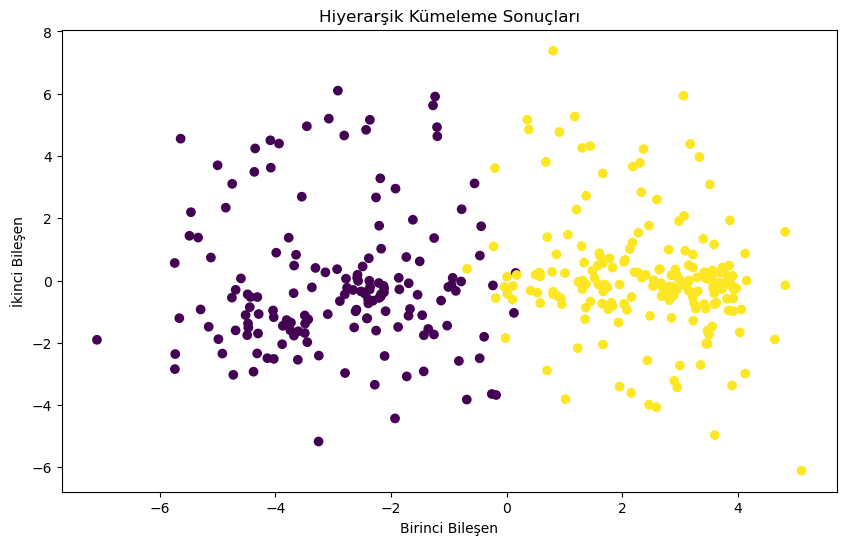

In [347]:
# Hiyerarşik Kümeleme
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(X_scaled)

print("\nHiyerarşik Kümeleme Sonuçları:")

# Silhouette skoru
if len(np.unique(agg_labels)) > 1:
    agg_silhouette = silhouette_score(X_scaled, agg_labels)
    print(f"Silhouette Skoru: {agg_silhouette:.4f}")

# Adjusted Rand Index
agg_ari = adjusted_rand_score(y, agg_labels)
print(f"Adjusted Rand Index: {agg_ari:.4f}")

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hiyerarşik Kümeleme Sonuçları')
plt.xlabel('Birinci Bileşen')
plt.ylabel('İkinci Bileşen')
plt.savefig('Hiyerarsik_kumeleme.png')

results2['Hiyerarşik Kümeleme'] = {
    'silhouette_score': agg_silhouette if len(np.unique(agg_labels)) > 1 else None,
    'adjusted_rand_score': agg_ari,
    'labels': agg_labels
}

**Mean Shift**


Mean-shift Kümeleme Sonuçları:
Adjusted Rand Index: 0.0000
Bulunan küme sayısı: 1


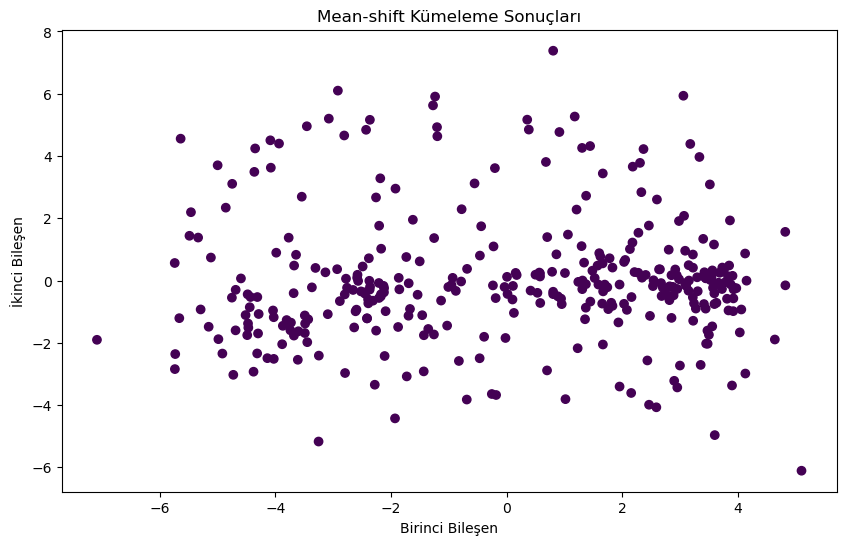

In [350]:
# Mean-shift Kümeleme
print("\nMean-shift Kümeleme Sonuçları:")

# Bant genişliğini otomatik belirleme (düzeltilmiş import ile)
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_labels = meanshift.fit_predict(X_scaled)

# Silhouette skoru
if len(np.unique(meanshift_labels)) > 1:
    meanshift_silhouette = silhouette_score(X_scaled, meanshift_labels)
    print(f"Silhouette Skoru: {meanshift_silhouette:.4f}")

# Adjusted Rand Index
meanshift_ari = adjusted_rand_score(y, meanshift_labels)
print(f"Adjusted Rand Index: {meanshift_ari:.4f}")
print(f"Bulunan küme sayısı: {len(np.unique(meanshift_labels))}")

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=meanshift_labels, cmap='viridis')
plt.title('Mean-shift Kümeleme Sonuçları')
plt.xlabel('Birinci Bileşen')
plt.ylabel('İkinci Bileşen')
plt.savefig('Meanshift_kumeleme.png')

results2['Mean-shift'] = {
    'silhouette_score': meanshift_silhouette if len(np.unique(meanshift_labels)) > 1 else None,
    'adjusted_rand_score': meanshift_ari,
    'n_clusters': len(np.unique(meanshift_labels)),
    'labels': meanshift_labels
}

**Spectral Clustering**


Spectral Clustering Sonuçları:
Silhouette Skoru: 0.2324
Adjusted Rand Index: -0.0336


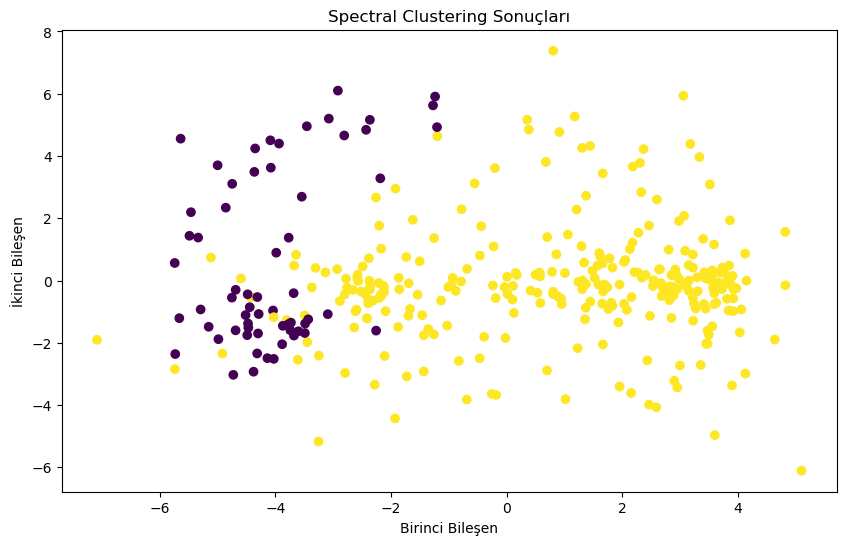

In [353]:
# Spectral Clustering
print("\nSpectral Clustering Sonuçları:")

spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)

# Silhouette skoru
if len(np.unique(spectral_labels)) > 1:
    spectral_silhouette = silhouette_score(X_scaled, spectral_labels)
    print(f"Silhouette Skoru: {spectral_silhouette:.4f}")

# Adjusted Rand Index
spectral_ari = adjusted_rand_score(y, spectral_labels)
print(f"Adjusted Rand Index: {spectral_ari:.4f}")

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=spectral_labels, cmap='viridis')
plt.title('Spectral Clustering Sonuçları')
plt.xlabel('Birinci Bileşen')
plt.ylabel('İkinci Bileşen')
plt.savefig('Spectral_kumeleme.png')

results2['Spectral Clustering'] = {
    'silhouette_score': spectral_silhouette if len(np.unique(spectral_labels)) > 1 else None,
    'adjusted_rand_score': spectral_ari,
    'labels': spectral_labels
}

**Affinity Propagation**


Affinity Propagation Sonuçları:
Silhouette Skoru: 0.2039
Adjusted Rand Index: 0.1183
Bulunan küme sayısı: 49


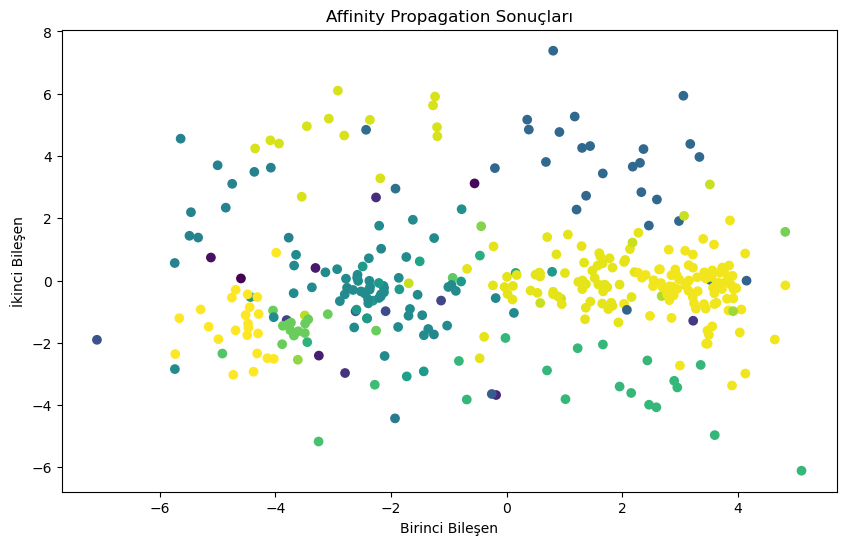

In [356]:
# Affinity Propagation
print("\nAffinity Propagation Sonuçları:")

affinity = AffinityPropagation(damping=0.7, random_state=42)
affinity_labels = affinity.fit_predict(X_scaled)

# Silhouette skoru
if len(np.unique(affinity_labels)) > 1:
    affinity_silhouette = silhouette_score(X_scaled, affinity_labels)
    print(f"Silhouette Skoru: {affinity_silhouette:.4f}")

# Adjusted Rand Index
affinity_ari = adjusted_rand_score(y, affinity_labels)
print(f"Adjusted Rand Index: {affinity_ari:.4f}")
print(f"Bulunan küme sayısı: {len(np.unique(affinity_labels))}")

# Görselleştirme için PCA
pca_aff = PCA(n_components=2)
X_pca_aff = pca_aff.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_aff[:, 0], X_pca_aff[:, 1], c=affinity_labels, cmap='viridis')
plt.title('Affinity Propagation Sonuçları')
plt.xlabel('Birinci Bileşen')
plt.ylabel('İkinci Bileşen')
plt.savefig('Affinity_kumeleme.png')


results2['Affinity Propagation'] = {
    'silhouette_score': affinity_silhouette if len(np.unique(affinity_labels)) > 1 else None,
    'adjusted_rand_score': affinity_ari,
    'n_clusters': len(np.unique(affinity_labels)),
    'labels': affinity_labels
}

**Kümeleme fonksiyonlarının kıyaslanması**

In [359]:
# Tüm kümeleme sonuçlarını gösterme
print("\nTüm Kümeleme Algoritmalarının Performans Sonuçları:")
for name, result2 in results2.items():
    print(f"\n{name}:")
    if 'n_clusters' in result2:
        print(f"Küme sayısı: {result2['n_clusters']}")
    if result2['silhouette_score'] is not None:
        print(f"Silhouette Skoru: {result2['silhouette_score']:.4f}")
    else:
        print("Silhouette Skoru: Hesaplanamadı (yeterli küme yok)")
    print(f"Adjusted Rand Index: {result2['adjusted_rand_score']:.4f}")


Tüm Kümeleme Algoritmalarının Performans Sonuçları:

K-Means:
Silhouette Skoru: 0.2704
Adjusted Rand Index: 0.1679

DBSCAN:
Silhouette Skoru: Hesaplanamadı (yeterli küme yok)
Adjusted Rand Index: -0.0346

Hiyerarşik Kümeleme:
Silhouette Skoru: 0.2713
Adjusted Rand Index: 0.1775

Mean-shift:
Küme sayısı: 1
Silhouette Skoru: Hesaplanamadı (yeterli küme yok)
Adjusted Rand Index: 0.0000

Spectral Clustering:
Silhouette Skoru: 0.2324
Adjusted Rand Index: -0.0336

Affinity Propagation:
Küme sayısı: 49
Silhouette Skoru: 0.2039
Adjusted Rand Index: 0.1183


**Gördüğümüz gibi bu veri seti kümeleme için çok kötü sonuçlar veriyor. Bu amaca uygun değil. Yine de en iyi üçünü seçmek zorundaysak bunlar sırasıyla Hiyerarşik Kümeleme, K-Means, Spectral Clustering olur.**